In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
data=pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
columns=['residual sugar','free sulfur dioxide','pH','fixed acidity']
data.drop(columns,axis=1,inplace=True)

data.head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
0,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5
1,0.88,0.00,0.098,67.0,0.9968,0.68,9.8,5
2,0.76,0.04,0.092,54.0,0.9970,0.65,9.8,5
3,0.28,0.56,0.075,60.0,0.9980,0.58,9.8,6
4,0.70,0.00,0.076,34.0,0.9978,0.56,9.4,5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   volatile acidity      1599 non-null   float64
 1   citric acid           1599 non-null   float64
 2   chlorides             1599 non-null   float64
 3   total sulfur dioxide  1599 non-null   float64
 4   density               1599 non-null   float64
 5   sulphates             1599 non-null   float64
 6   alcohol               1599 non-null   float64
 7   quality               1599 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 100.1 KB


In [5]:
data.describe()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.527821,0.270976,0.087467,46.467792,0.996747,0.658149,10.422983,5.636023
std,0.179060,0.194801,0.047065,32.895324,0.001887,0.169507,1.065668,0.807569
min,0.120000,0.000000,0.012000,6.000000,0.990070,0.330000,8.400000,3.000000
25%,0.390000,0.090000,0.070000,22.000000,0.995600,0.550000,9.500000,5.000000
50%,0.520000,0.260000,0.079000,38.000000,0.996750,0.620000,10.200000,6.000000
75%,0.640000,0.420000,0.090000,62.000000,0.997835,0.730000,11.100000,6.000000
max,1.580000,1.000000,0.611000,289.000000,1.003690,2.000000,14.900000,8.000000


In [6]:
data.sort_values(by='quality',ascending=False).head()

,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,sulphates,alcohol,quality
495,0.35,0.53,0.070,16.0,0.99720,0.65,11.0,8
1403,0.33,0.33,0.061,13.0,0.99600,1.10,10.0,8
390,0.85,0.05,0.045,88.0,0.99240,0.82,12.9,8
1061,0.40,0.50,0.071,16.0,0.99462,0.69,12.5,8
1202,0.42,0.39,0.068,12.0,0.99516,0.69,11.7,8


In [22]:
target='quality'

x=data[['alcohol','volatile acidity']]
y=data[target]

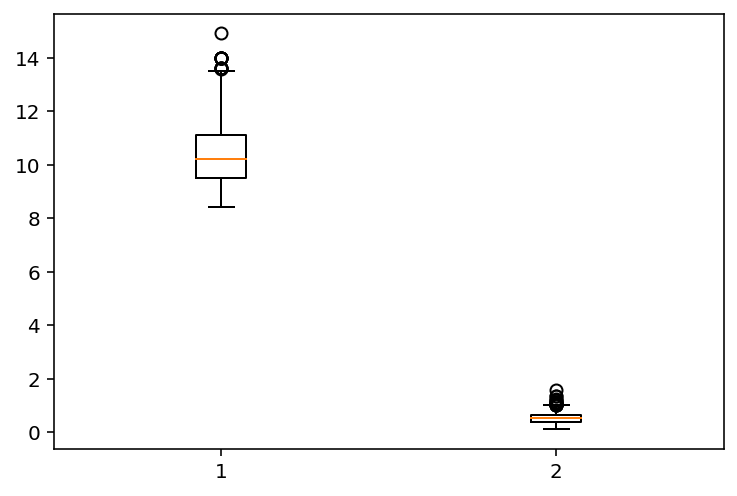

In [23]:
plt.boxplot(x)
plt.show()

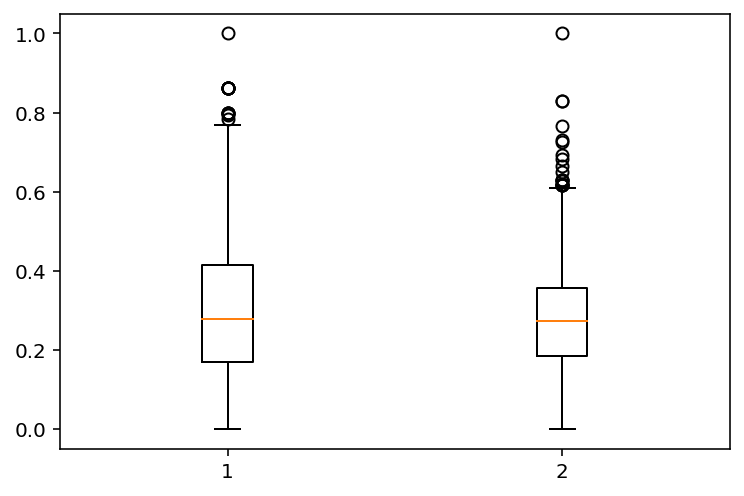

In [24]:
x=(x-x.min())/(x.max()-x.min())

plt.boxplot(x)
plt.show()

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=2022)

In [26]:
# Logistic 회귀
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

model=LogisticRegression()
cv_score=cross_val_score(model,x_train,y_train,cv=10)

print(cv_score)
print(cv_score.mean())


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


[0.58928571 0.51785714 0.57142857 0.59821429 0.59821429 0.5
 0.54464286 0.54464286 0.58928571 0.56756757]
0.5621138996138997


In [27]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

model=KNeighborsClassifier()
cv_score=cross_val_score(model,x_train,y_train,cv=10)

print(cv_score)
print(cv_score.mean())

[0.52678571 0.5625     0.48214286 0.5        0.52678571 0.55357143
 0.59821429 0.58035714 0.57142857 0.6036036 ]
0.5505389317889318


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [28]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

model=DecisionTreeClassifier(random_state=2022)
cv_score=cross_val_score(model,x_train,y_train,cv=10)

print(cv_score)
print(cv_score.mean())

[0.52678571 0.53571429 0.54464286 0.53571429 0.53571429 0.52678571
 0.58928571 0.58035714 0.59821429 0.54954955]
0.5522763835263835


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


In [29]:
#SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

model=SVC()
cv_score=cross_val_score(model,x_train,y_train,cv=10)

print(cv_score)
print(cv_score.mean())

C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(


[0.57142857 0.54464286 0.58035714 0.60714286 0.625      0.5
 0.55357143 0.58928571 0.58928571 0.62162162]
0.5782335907335907


In [31]:
# SVM 평가
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print("-"*50)
print(classification_report(y_test,y_pred))

[[  0   0   3   0   0   0]
 [  0   0  12   8   0   0]
 [  0   0 154  48   0   0]
 [  0   0  80 111   0   0]
 [  0   0   6  55   0   0]
 [  0   0   0   3   0   0]]
--------------------------------------------------
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00        20
           5       0.60      0.76      0.67       202
           6       0.49      0.58      0.53       191
           7       0.00      0.00      0.00        61
           8       0.00      0.00      0.00         3

    accuracy                           0.55       480
   macro avg       0.18      0.22      0.20       480
weighted avg       0.45      0.55      0.50       480



C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


C:\Users\User\AppData\Roaming\Python\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


TypeError: Shapes of x (30, 30) and z (900, 6) do not match

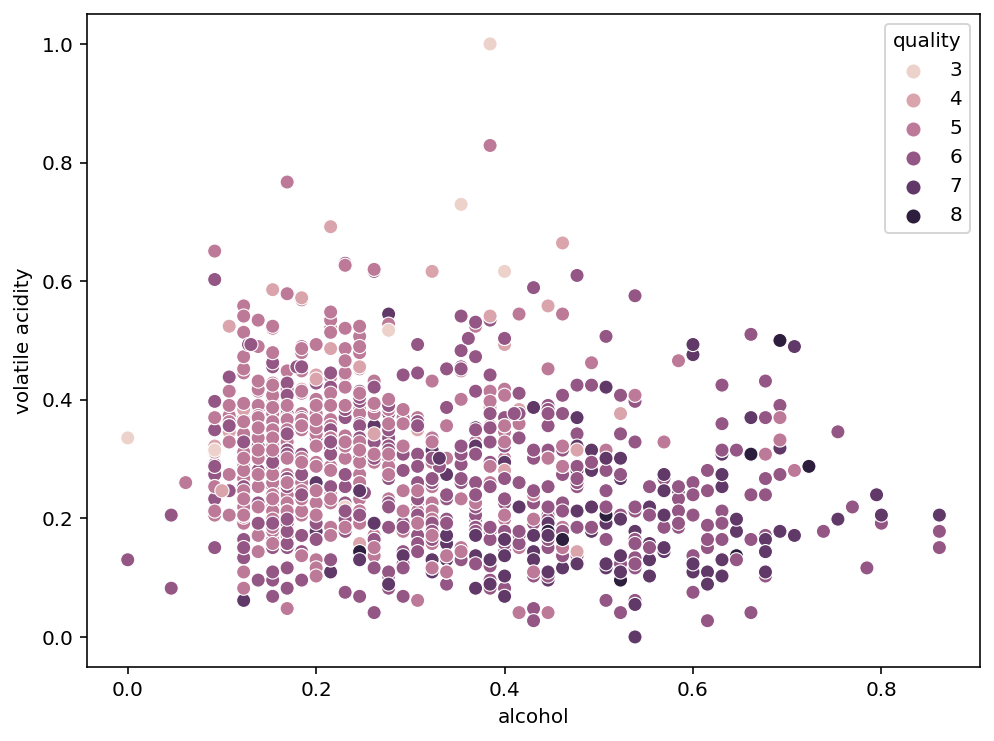

In [35]:
#  시각화
xx = np.linspace(0, 1,30)
yy = np.linspace(0, 1,30)
yy, xx = np.meshgrid(yy, xx)
xy = np.vstack([xx.ravel(), yy.ravel()]).T
z = model.decision_function(xy)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_train['alcohol'], y=x_train['volatile acidity'], hue=y, s=50)
# plt.scatter(model.support_vectors_[:, 0], 
#             model.support_vectors_[:, 1], 
#             s=80,
#             linewidth=1,
#             facecolors='none', 
#             color='r')
plt.contour(xx, yy, z, 
            colors='k', 
            levels=[-1, 0, 1], 
            alpha=0.5,
            linestyles=['--', '-', '--'])

plt.xlabel('alcohol')
plt.ylabel('volatile acidity')
plt.show()